In [714]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [715]:
data =pd.read_csv("Airbnb_Open_Data.csv")

C:\Users\Heman\AppData\Local\Temp\ipykernel_18496\2370090028.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv("Airbnb_Open_Data.csv")


In [716]:
df = pd.DataFrame(data)

In [717]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [719]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [720]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Normalize column names
print(df.columns)


Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')


In [721]:
df['instant_bookable'].value_counts()

instant_bookable
False    51474
True     51020
Name: count, dtype: int64

In [722]:
df["cancellation_policy"].value_counts()

cancellation_policy
moderate    34343
strict      34106
flexible    34074
Name: count, dtype: int64

In [723]:
df["room_type"].value_counts()

room_type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

DATA CLEANING

In [724]:
df1=df
# droping minimum nights cause the data entered is not correct
df1=df.drop(["minimum_nights"],axis=1)
# we are dropping availability 365 also as it contains wrong entry of data even though it effects the price
df1=df1.drop(["availability_365"],axis=1)

In [725]:
col=df1.columns
if "minimum_nights" and "availability_365" in col:
    print("yes")
else:
    print("no")

# so minimum nights is removed from the data

no


In [726]:
# Replace all non-null values in 'column_name' with 'Yes'
df1['house_rules'] = df1['house_rules'].apply(lambda x: 'Yes' if pd.notnull(x) else x)

# Fill missing values in 'column_name' with 'Unknown'
df1['house_rules'].fillna('No', inplace=True)

C:\Users\Heman\AppData\Local\Temp\ipykernel_18496\429281975.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['house_rules'].fillna('No', inplace=True)


In [727]:
# so we converted all the house with no rules into no and all the houses with house rules into yes
df1["house_rules"].value_counts()

house_rules
No     52131
Yes    50468
Name: count, dtype: int64

In [728]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [729]:
# now as of price and service fee are object type we need to convert them into int type
#coz money should be in numbers i.e,int not in object type

columns_to_convert = ["price","service_fee"]
for column in columns_to_convert:
    df1[column] = df[column].replace({'\$': '', ',': ''}, regex=True)
    df1[column] = df1[column].astype('Int64')

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Heman\AppData\Local\Temp\ipykernel_18496\2900728454.py:6: SyntaxWarning: invalid escape sequence '\$'
  df1[column] = df[column].replace({'\$': '', ',': ''}, regex=True)


In [730]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [731]:
df1["country"].value_counts()

country
United States    102067
Name: count, dtype: int64

In [732]:
df1.isna().sum()

id                                     0
name                                 250
host_id                                0
host_identity_verified               289
host_name                            406
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
house_rules                            0
license                           102597
dtype: int64

In [733]:
df1["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

In [734]:
neighborhood_mapping = {
    'brookln': 'Brooklyn',
    'manhatan': 'Manhattan'
}

# Replace the incorrect values in the 'neighbourhood' column
df1['neighbourhood_group'] = df1['neighbourhood_group'].replace(neighborhood_mapping)
df1["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: int64

In [735]:
# replacing empty country values with usa 
df1["country"].fillna("United States",inplace=True)

C:\Users\Heman\AppData\Local\Temp\ipykernel_18496\285043853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["country"].fillna("United States",inplace=True)


In [736]:
# Replace NaN values in a instant_bookable with random True/False
df1['instant_bookable'] = df['instant_bookable'].apply(lambda x: np.random.choice([True, False]) if pd.isna(x) else x)

In [737]:
# Replace NaN values in a cancellation_policy with a random choice of 'moderate', 'strict', or 'flexible'
df1['cancellation_policy'] = df1['cancellation_policy'].apply(lambda x: np.random.choice(['moderate', 'strict', 'flexible']) if pd.isna(x) else x)


In [738]:
#checking if changed or not 
df1["cancellation_policy"].value_counts()

cancellation_policy
moderate    34372
strict      34136
flexible    34091
Name: count, dtype: int64

In [739]:
# replacing the missing values in the "price" and "service fee" with the mean of the column
df1['service_fee'] = df1['service_fee'].fillna(int(df1['service_fee'].mean()))
df1['price'] = df1['price'].fillna(int(df1['price'].mean()))

In [740]:
df1["number_of_reviews"]=df1["number_of_reviews"].fillna(int(df1['number_of_reviews'].mean()))

In [741]:
#filling missing values from construction year with their bottow row values
df1['construction_year'] = df1['construction_year'].fillna(method='bfill')


C:\Users\Heman\AppData\Local\Temp\ipykernel_18496\990198188.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['construction_year'] = df1['construction_year'].fillna(method='bfill')


In [742]:
columnss = ["lat","long","neighbourhood_group","neighbourhood"]
for column in columnss:
    df1 = df1.dropna(subset=[column])

In [743]:
df1.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'house_rules', 'license'],
      dtype='object')

In [744]:
df1["country_code"].fillna("US",inplace=True)

C:\Users\Heman\AppData\Local\Temp\ipykernel_18496\108290750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["country_code"].fillna("US",inplace=True)


In [745]:
df1.isna().sum() 

id                                     0
name                                 248
host_id                                0
host_identity_verified               281
host_name                            405
neighbourhood_group                    0
neighbourhood                          0
lat                                    0
long                                   0
country                                0
country_code                           0
instant_bookable                       0
cancellation_policy                    0
room_type                              0
construction_year                      0
price                                  0
service_fee                            0
number_of_reviews                      0
last_review                        15888
reviews_per_month                  15876
review_rate_number                   324
calculated_host_listings_count       319
house_rules                            0
license                           102544
dtype: int64

In [746]:
df1["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        43781
Brooklyn         41832
Queens           13266
Bronx             2712
Staten Island      955
Name: count, dtype: int64

In [747]:
df1["neighbourhood"].value_counts()

neighbourhood
Bedford-Stuyvesant        7936
Williamsburg              7770
Harlem                    5463
Bushwick                  4979
Hell's Kitchen            3965
                          ... 
Rossville                    3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

In [748]:
df1["room_type"].value_counts()

room_type
Entire home/apt    53677
Private room       46527
Shared room         2226
Hotel room           116
Name: count, dtype: int64

In [749]:
df1.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'house_rules', 'license'],
      dtype='object')

EDA

In [750]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102546 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102546 non-null  int64  
 1   name                            102298 non-null  object 
 2   host_id                         102546 non-null  int64  
 3   host_identity_verified          102265 non-null  object 
 4   host_name                       102141 non-null  object 
 5   neighbourhood_group             102546 non-null  object 
 6   neighbourhood                   102546 non-null  object 
 7   lat                             102546 non-null  float64
 8   long                            102546 non-null  float64
 9   country                         102546 non-null  object 
 10  country_code                    102546 non-null  object 
 11  instant_bookable                102546 non-null  bool   
 12  cancellation_policy  

In [751]:
df1.isna().sum()

id                                     0
name                                 248
host_id                                0
host_identity_verified               281
host_name                            405
neighbourhood_group                    0
neighbourhood                          0
lat                                    0
long                                   0
country                                0
country_code                           0
instant_bookable                       0
cancellation_policy                    0
room_type                              0
construction_year                      0
price                                  0
service_fee                            0
number_of_reviews                      0
last_review                        15888
reviews_per_month                  15876
review_rate_number                   324
calculated_host_listings_count       319
house_rules                            0
license                           102544
dtype: int64

In [752]:
df1.describe()

,id,host_id,lat,long,construction_year,price,service_fee,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count
count,1.025460e+05,1.025460e+05,102546.000000,102546.000000,102546.000000,102546.0,102546.0,102546.000000,86670.000000,102222.000000,102227.000000
mean,2.916022e+07,4.925428e+10,40.728090,-73.949642,2012.491292,625.276208,125.023492,27.458633,1.374339,3.279157,7.938989
std,1.624978e+07,2.853818e+10,0.055859,0.049525,5.765706,331.287429,66.240446,49.425855,1.746940,1.284604,32.226639
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.0,10.0,0.000000,0.010000,1.000000,1.000000
25%,1.510666e+07,2.458368e+10,40.688740,-73.982580,2008.000000,341.0,68.0,1.000000,0.220000,2.000000,1.000000
50%,2.915124e+07,4.911800e+10,40.722290,-73.954440,2012.000000,625.0,125.0,7.000000,0.740000,3.000000,1.000000
75%,4.320852e+07,7.399621e+10,40.762760,-73.932350,2018.000000,912.0,182.0,30.000000,2.000000,4.000000,2.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.0,240.0,1024.000000,90.000000,5.000000,332.000000


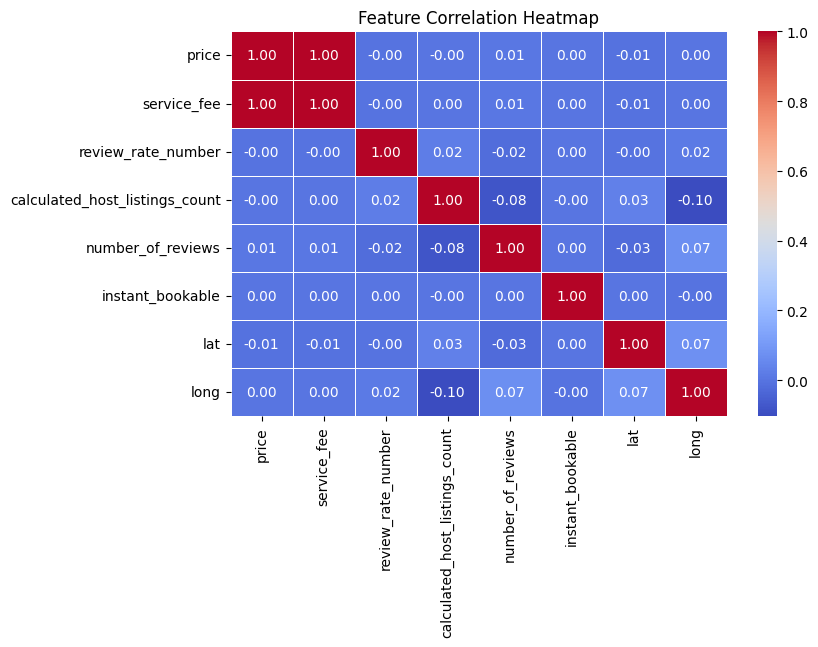

In [753]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df1[["price", "service_fee", "review_rate_number", "calculated_host_listings_count","number_of_reviews",
                   "instant_bookable","lat","long"]].corr()

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [754]:
print(df1.columns)


Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'house_rules', 'license'],
      dtype='object')


In [755]:
df1.isna().sum()

id                                     0
name                                 248
host_id                                0
host_identity_verified               281
host_name                            405
neighbourhood_group                    0
neighbourhood                          0
lat                                    0
long                                   0
country                                0
country_code                           0
instant_bookable                       0
cancellation_policy                    0
room_type                              0
construction_year                      0
price                                  0
service_fee                            0
number_of_reviews                      0
last_review                        15888
reviews_per_month                  15876
review_rate_number                   324
calculated_host_listings_count       319
house_rules                            0
license                           102544
dtype: int64

In [757]:
#i just know i have to use one hot encoding idk how to so i gbt the code from the internet
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# 1. One-Hot Encoding for 'cancellation_policy' (3 categories)
encoder_cancellation_policy = OneHotEncoder(drop='first')
cancellation_policy_encoded = encoder_cancellation_policy.fit_transform(df1[['cancellation_policy']])

# Convert to DataFrame (we need to convert the sparse matrix to a dense matrix)
cancellation_policy_df = pd.DataFrame(cancellation_policy_encoded.toarray(), 
                                      columns=encoder_cancellation_policy.get_feature_names_out(['cancellation_policy']))

# 2. Label Encoding for 'instant_bookable' (2 categories)
label_encoder = LabelEncoder()
df1['instant_bookable'] = label_encoder.fit_transform(df1['instant_bookable'])

# 3. One-Hot Encoding for 'room_type' (4 categories)
encoder_room_type = OneHotEncoder(drop='first')
room_type_encoded = encoder_room_type.fit_transform(df1[['room_type']])

# Convert to DataFrame (we need to convert the sparse matrix to a dense matrix)
room_type_df = pd.DataFrame(room_type_encoded.toarray(), columns=encoder_room_type.get_feature_names_out(['room_type']))

# Combine all the encoded columns with the original DataFrame
df1 = pd.concat([df1, cancellation_policy_df, room_type_df], axis=1)

# Drop original categorical columns
df1 = df1.drop(columns=['cancellation_policy', 'room_type'])


In [760]:
# Drop rows with NaN values in any column
#df1.dropna(inplace=True)

# Verify that all rows with NaN values have been dropped
#print(df1.isna().sum())


In [761]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2.2: Data Preprocessing - Scaling/Normalization
# Select numerical features for scaling (lat, long, price, etc.)
numerical_columns = ['lat', 'long', 'service_fee','price']
scaler = StandardScaler()

# Apply scaling to the numerical features
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])



In [762]:
# Drop columns that are not useful or have non-numeric data
df1.drop(columns=["id","name","host_id","host_name","neighbourhood","neighbourhood_group","last_review","reviews_per_month","construction_year",
                  "review_rate_number","host_identity_verified","country","country_code","house_rules","license","calculated_host_listings_count"], inplace=True)

# Verify that the columns are dropped
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
Index: 102599 entries, 0 to 40396
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   lat                           102546 non-null  float64
 1   long                          102546 non-null  float64
 2   instant_bookable              102546 non-null  float64
 3   price                         102546 non-null  float64
 4   service_fee                   102546 non-null  float64
 5   number_of_reviews             102546 non-null  float64
 6   cancellation_policy_moderate  102546 non-null  float64
 7   cancellation_policy_strict    102546 non-null  float64
 8   room_type_Hotel room          102546 non-null  float64
 9   room_type_Private room        102546 non-null  float64
 10  room_type_Shared room         102546 non-null  float64
dtypes: float64(11)
memory usage: 9.4 MB
None


In [763]:
df1.isna().sum()    

lat                             53
long                            53
instant_bookable                53
price                           53
service_fee                     53
number_of_reviews               53
cancellation_policy_moderate    53
cancellation_policy_strict      53
room_type_Hotel room            53
room_type_Private room          53
room_type_Shared room           53
dtype: int64

In [764]:
# Drop rows with NaN values in any column
df1.dropna(inplace=True)

# Verify the drop
print(df1.isna().sum())


lat                             0
long                            0
instant_bookable                0
price                           0
service_fee                     0
number_of_reviews               0
cancellation_policy_moderate    0
cancellation_policy_strict      0
room_type_Hotel room            0
room_type_Private room          0
room_type_Shared room           0
dtype: int64


In [765]:
# Let's assume 'price' is the target variable and all other features are predictors
X = df1.drop(columns=['price'])  # Features (exclude the target 'price' column)
y = df1['price']  # Target variable (price)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2.4: Model Selection - Linear Regression
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.003349908572755294
R-squared: 0.996639201083744


In [766]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [767]:
# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)
# Predict on the test set
y_pred = rf_model.predict(X_test)
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.004249579631039422
R-squared: 0.995736605251052
